In [1]:
import os
from os import path as op
import numpy as np
from scipy import stats
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist
import vlgp
from vlgp import util, simulation

In [38]:
# Set dimensions and simulation parameters
K1 = 500  # Number of observations for Group 1
K2 = 800  # Number of observations for Group 2
K = K1 + K2  # Total number of observations
D = 6  # Total latent dimensions
T = 250  # Number of time points
t = np.linspace(0, 2, T)  # Time intervals

d_s = 2  # Shared latent dimension
d_1 = 2  # Independent latent dimension for group 1
d_2 = 2  # Independent latent dimension for group 2

rho = 1.0  # Scale for GP kernel
l = 2.0  # Length scale for GP kernel
nu = 0.1  # Noise variance for observations

# Set factor loadings
A_1 = np.random.randn(K1, d_1)
A_2 = np.random.randn(K2, d_2)
A_s1 = np.random.randn(K1, d_s)
A_s2 = np.random.randn(K2, d_s)

A = np.block([[A_s1, A_1, np.zeros((K1, d_2))],
              [A_s2, np.zeros((K2, d_1)), A_2]])  # Group 2

def kernel_function(t1, t2, rho, l):
    """Squared exponential kernel."""
    dist_sq = cdist(t1.reshape(-1, 1), t2.reshape(-1, 1), metric='sqeuclidean')
    return rho * np.exp(-dist_sq / (2 * l ** 2))

K_t = kernel_function(t, t, rho, l)

z_shared = np.random.multivariate_normal(np.zeros(T), K_t, size=d_s).T
z_1 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_1).T
z_2 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_2).T

Z = np.hstack([z_shared, z_1, z_2])
Z

array([[-0.91204621,  0.20737456, -0.07240746,  0.45834817,  0.15476471,
        -1.16361378],
       [-0.91216274,  0.2066188 , -0.0704167 ,  0.45642799,  0.15002984,
        -1.16282218],
       [-0.91224451,  0.20587776, -0.06841606,  0.45448849,  0.14527957,
        -1.16204124],
       ...,
       [-0.39123091,  0.76430817, -0.27165416, -0.16433617, -0.83278872,
        -1.22527396],
       [-0.38904238,  0.77007322, -0.27744614, -0.16546264, -0.83442444,
        -1.225416  ],
       [-0.38687059,  0.77585953, -0.2832777 , -0.16656685, -0.83603549,
        -1.22554191]])

In [39]:
ntrial = 10  # Number of trials
nbin = 250  # Number of bins per trial to match T=250 as previously set
dim = 6  # Number latent dimensions
Z_cut = Z[:(Z.shape[0] // nbin) * nbin]
trials = [{'ID': i, 'y': Z_cut[i * nbin: (i + 1) * nbin].reshape(nbin, dim)} for i in range(Z_cut.shape[0] // nbin)]
trials

[{'ID': 0,
  'y': array([[-0.91204621,  0.20737456, -0.07240746,  0.45834817,  0.15476471,
          -1.16361378],
         [-0.91216274,  0.2066188 , -0.0704167 ,  0.45642799,  0.15002984,
          -1.16282218],
         [-0.91224451,  0.20587776, -0.06841606,  0.45448849,  0.14527957,
          -1.16204124],
         ...,
         [-0.39123091,  0.76430817, -0.27165416, -0.16433617, -0.83278872,
          -1.22527396],
         [-0.38904238,  0.77007322, -0.27744614, -0.16546264, -0.83442444,
          -1.225416  ],
         [-0.38687059,  0.77585953, -0.2832777 , -0.16656685, -0.83603549,
          -1.22554191]])}]

In [53]:
z_shared2 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_s).T
z_12 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_1).T
z_22 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_2).T

Z2 = np.hstack([z_shared, z_1, z_2])
Z2
Z_cut2 = Z2[:(Z2.shape[0] // nbin) * nbin]
trials2 = [{'ID': i, 'y': Z_cut2[i * nbin: (i + 1) * nbin].reshape(nbin, dim)} for i in range(Z_cut2.shape[0] // nbin)]
trials2

[{'ID': 0,
  'y': array([[-0.91204621,  0.20737456, -0.07240746,  0.45834817,  0.15476471,
          -1.16361378],
         [-0.91216274,  0.2066188 , -0.0704167 ,  0.45642799,  0.15002984,
          -1.16282218],
         [-0.91224451,  0.20587776, -0.06841606,  0.45448849,  0.14527957,
          -1.16204124],
         ...,
         [-0.39123091,  0.76430817, -0.27165416, -0.16433617, -0.83278872,
          -1.22527396],
         [-0.38904238,  0.77007322, -0.27744614, -0.16546264, -0.83442444,
          -1.225416  ],
         [-0.38687059,  0.77585953, -0.2832777 , -0.16656685, -0.83603549,
          -1.22554191]])}]

In [40]:
#np.random.seed(0)

fit = vlgp.fit(
    trials,  
    n_factors=5,  # dimensionality of latent process
)

Initializing
Initialized
Fitting
Iteration    1, E-step 0.36s, M-step 0.06s
Iteration    2, E-step 0.39s, M-step 0.05s
Iteration    3, E-step 0.35s, M-step 0.04s
Iteration    4, E-step 0.32s, M-step 0.04s
Iteration    5, E-step 0.32s, M-step 0.04s
Iteration    6, E-step 0.32s, M-step 0.04s
Iteration    7, E-step 0.38s, M-step 0.04s
Iteration    8, E-step 0.30s, M-step 0.04s
Iteration    9, E-step 0.28s, M-step 0.04s
Iteration   10, E-step 0.29s, M-step 0.04s
Iteration   11, E-step 0.31s, M-step 0.05s
Iteration   12, E-step 0.39s, M-step 0.07s
Iteration   13, E-step 0.39s, M-step 0.05s
Iteration   14, E-step 0.35s, M-step 0.05s
Iteration   15, E-step 0.35s, M-step 0.06s
Iteration   16, E-step 0.45s, M-step 0.05s
Iteration   17, E-step 0.38s, M-step 0.05s
Iteration   18, E-step 0.35s, M-step 0.05s
Iteration   19, E-step 0.35s, M-step 0.05s
Iteration   20, E-step 0.39s, M-step 0.06s
Inferring
0.12s
Done


In [41]:
fit

{'trials': [{'ID': 0,
   'y': array([[-0.91204621,  0.20737456, -0.07240746,  0.45834817,  0.15476471,
           -1.16361378],
          [-0.91216274,  0.2066188 , -0.0704167 ,  0.45642799,  0.15002984,
           -1.16282218],
          [-0.91224451,  0.20587776, -0.06841606,  0.45448849,  0.14527957,
           -1.16204124],
          ...,
          [-0.39123091,  0.76430817, -0.27165416, -0.16433617, -0.83278872,
           -1.22527396],
          [-0.38904238,  0.77007322, -0.27744614, -0.16546264, -0.83442444,
           -1.225416  ],
          [-0.38687059,  0.77585953, -0.2832777 , -0.16656685, -0.83603549,
           -1.22554191]]),
   'mu': array([[-3.19389905e+46, -3.68625414e+47, -1.72156760e+46,
           -1.73814291e+46, -1.47126767e+46],
          [-7.93505698e+46, -4.57432949e+47, -1.84632685e+46,
           -1.86298045e+46, -1.59419119e+46],
          [-1.24347204e+47, -5.40107586e+47, -1.96944325e+46,
           -1.98621111e+46, -1.71479988e+46],
          ...,
     

In [54]:
fit2 = vlgp.fit(
    trials2,  
    n_factors=5,  # dimensionality of latent process
)

Initializing
Initialized
Fitting
Iteration    1, E-step 0.76s, M-step 0.06s
Iteration    2, E-step 0.36s, M-step 0.04s
Iteration    3, E-step 0.63s, M-step 0.04s
Iteration    4, E-step 0.28s, M-step 0.04s
Iteration    5, E-step 0.29s, M-step 0.04s
Iteration    6, E-step 0.31s, M-step 0.04s
Iteration    7, E-step 0.31s, M-step 0.05s
Iteration    8, E-step 0.36s, M-step 0.05s
Iteration    9, E-step 0.34s, M-step 0.05s
Iteration   10, E-step 0.33s, M-step 0.05s
Iteration   11, E-step 0.42s, M-step 0.05s
Iteration   12, E-step 0.35s, M-step 0.05s
Iteration   13, E-step 0.36s, M-step 0.05s
Iteration   14, E-step 0.34s, M-step 0.05s
Iteration   15, E-step 0.34s, M-step 0.05s
Iteration   16, E-step 0.35s, M-step 0.05s
Iteration   17, E-step 0.34s, M-step 0.05s
Iteration   18, E-step 0.39s, M-step 0.05s
Iteration   19, E-step 0.54s, M-step 0.07s
Iteration   20, E-step 0.59s, M-step 0.07s
Inferring
0.12s
Done


In [55]:
fit2

{'trials': [{'ID': 0,
   'y': array([[-0.91204621,  0.20737456, -0.07240746,  0.45834817,  0.15476471,
           -1.16361378],
          [-0.91216274,  0.2066188 , -0.0704167 ,  0.45642799,  0.15002984,
           -1.16282218],
          [-0.91224451,  0.20587776, -0.06841606,  0.45448849,  0.14527957,
           -1.16204124],
          ...,
          [-0.39123091,  0.76430817, -0.27165416, -0.16433617, -0.83278872,
           -1.22527396],
          [-0.38904238,  0.77007322, -0.27744614, -0.16546264, -0.83442444,
           -1.225416  ],
          [-0.38687059,  0.77585953, -0.2832777 , -0.16656685, -0.83603549,
           -1.22554191]]),
   'mu': array([[-2.80828101e+46, -4.39242915e+47, -1.95360592e+46,
           -1.97604309e+46,  1.51341726e+46],
          [-8.13088973e+46, -5.42695192e+47, -2.09639991e+46,
           -2.11919431e+46,  1.65363393e+46],
          [-1.31821331e+47, -6.39420457e+47, -2.23731431e+46,
           -2.26050210e+46,  1.79003128e+46],
          ...,
     

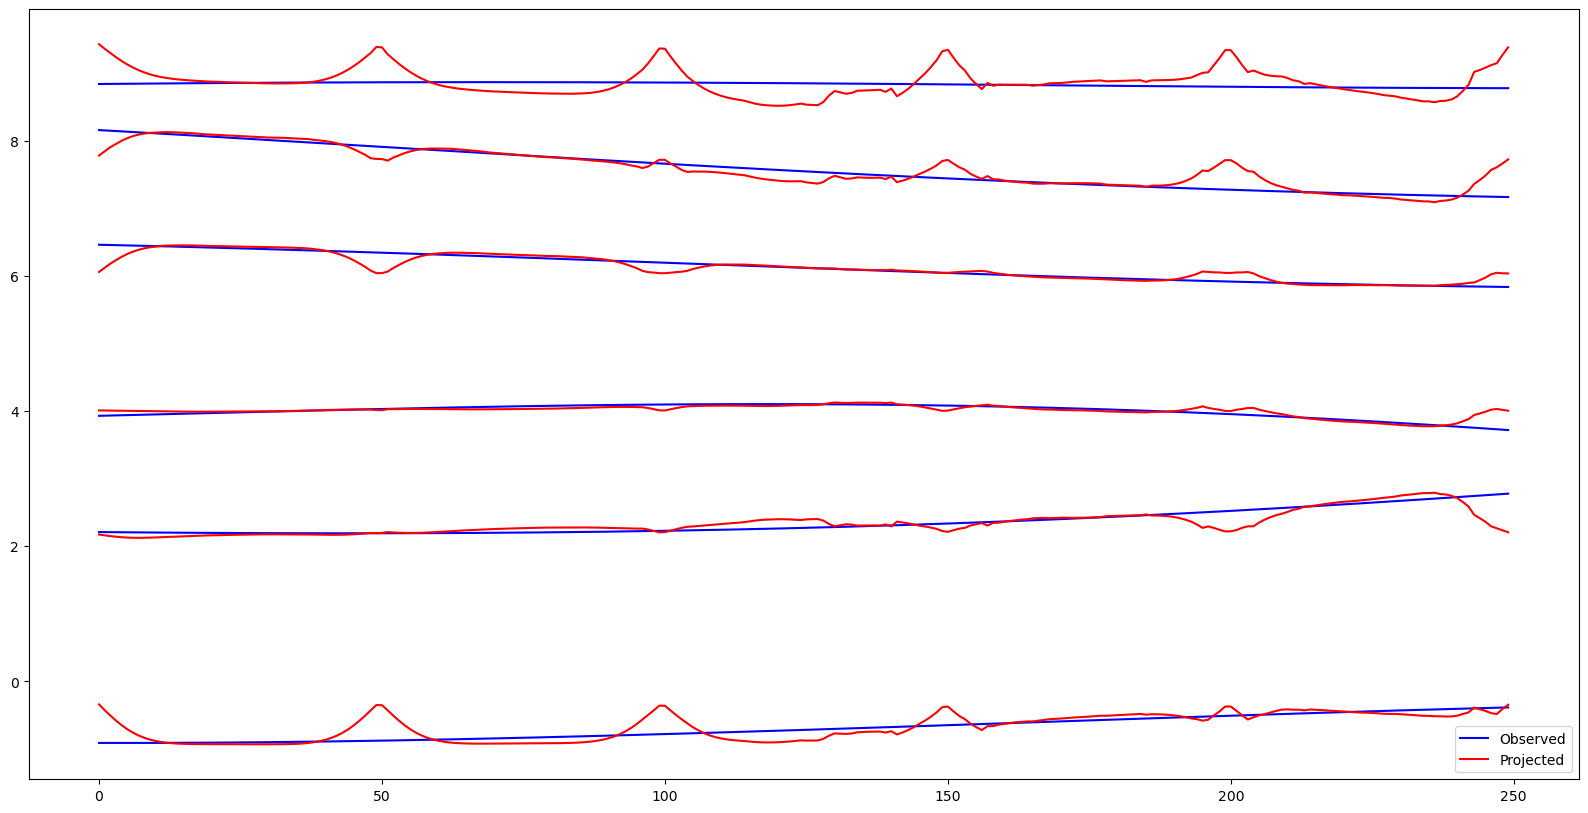

In [42]:
trials = fit['trials']  # extract trials
for i in range(len(trials)):
    trial = trials[i]
    x = trial['y']  # observed data
    mu = trial['mu']  # posterior latent

    # Calculate the projection matrix from latent space to observed space
    W, _, _, _ = np.linalg.lstsq(mu, x, rcond=None)
    mu_proj = mu @ W 
    
    # Plotting
    plt.figure(figsize=(20, 10))
    for j in range(x.shape[1]):
        offset = 2 * j
        plt.plot(x[:, j] + offset, 'b', label='Observed' if j == 0 else "")
        plt.plot(mu_proj[:, j] + offset, 'r', label='Projected' if j == 0 else "")
    plt.legend()
    plt.show()
    plt.close()


In [43]:
trials = fit['trials']  # extract trials
rmses = [] 

for i, trial in enumerate(trials):
    x = trial['y']  # observed data
    mu = trial['mu']  # posterior latent

    # Calculate the projection matrix from latent space to observed space
    W, _, _, _ = np.linalg.lstsq(mu, x, rcond=None)
    mu_proj = mu @ W  
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((x - mu_proj) ** 2))
    rmses.append(rmse)

rmses

[0.12929240356226326]

In [44]:
# Correlation Coefficients
def calculate_correlation(cor, pred):
    correlation_matrix = np.corrcoef(cor.T, pred.T)
    num_variables = cor.shape[1]
    return np.diag(correlation_matrix[num_variables:, :num_variables])

correlations = [calculate_correlation(trial['y'], mu @ W) for trial in trials]
correlations


[array([ 0.72475484,  0.79658656,  0.80928886,  0.90883427,  0.90848752,
        -0.01746491])]

In [45]:
# Z Z.transpose

In [46]:
# ask how important it is to use this model
# check how well it really does and if its worth it
# look at reconstruction error (rmse) and prediction error
# cross validated likelihood
# r squared and correlation (might be weird)
# eval model if using gauss isntead of poiss
# was gp even worth doing
# ask and explore answer to these questions
# how much of an improvement does each part of the model make to the complete model
# make sure to make fair comparisons (same latents, same vars, etc)
# benchmarking the model and justifying its use

# pCCA Model

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import numpy as np

class ProbabilisticCCA:
    def __init__(self, n_components=2, n_iters=100, reg=1e-5):
        self.k = n_components
        self.n_iters = n_iters
        self.reg = reg  # Regularization term

    def fit(self, X1, X2):
        # Check if the number of samples are the same
        if X1.shape[0] != X2.shape[0]:
            min_samples = min(X1.shape[0], X2.shape[0])
            X1 = X1[:min_samples]
            X2 = X2[:min_samples]
            print(f"Resized datasets to match number of samples: {min_samples}")
        
        self.K1 = X1.shape[1]  # Features in X1
        self.K2 = X2.shape[1]  # Features in X2
        self._init_params(X1, X2)
        
        for _ in range(self.n_iters):
            self._em_step()
        
        # Add regularization to ensure Psi is positive semi-definite
        self.Psi += self.reg * np.eye(self.Psi.shape[0])

    def _init_params(self, X1, X2):
        N = X1.shape[0]  # Number of samples
        self.K = self.K1 + self.K2  # Total number of features
        
        # Mean of concatenated data
        self.mu = np.concatenate([X1.mean(axis=0), X2.mean(axis=0)])

        # Covariance matrix
        S = np.cov(np.hstack([X1, X2]).T, bias=True)

        # Initialize weights W (adjusted for different K1 and K2)
        self.W = np.random.randn(self.K, self.k)
        
        # Initialize Psi as the residual variance
        self.Psi = np.diag(np.diag(S))

        print("Initial W matrix:", self.W)

    def _em_step(self):
        # Invert Psi
        Psi_inv = np.linalg.pinv(self.Psi)
        
        # Adjusted W multiplication
        print("W shape:", self.W.shape)
        print("Psi_inv shape:", Psi_inv.shape)
        
        # Ensure correct matrix multiplication order
        M = np.linalg.pinv(np.eye(self.k) + 0.01 * self.W.T @ Psi_inv @ self.W)

        
        # Update W using the posterior covariance
        self.W = Psi_inv @ self.W @ M
        print("Updated W matrix:", self.W)

        # Print values of Z (latent variable)
        Z = np.random.randn(self.W.shape[0], self.k)
        print("Latent variable Z:", Z[:5])

        # Update Psi to maintain positive semi-definiteness
        self.Psi = np.diag(np.maximum(np.diag(self.Psi), self.reg))


    def sample(self, n_samples=100):
        # Sample latent variables
        Z = np.random.randn(n_samples, self.k)
        print("Latent variable Z:", Z[:5])  # Print first few Z values to check if they are different
        
        # Generate new observations
        X = Z @ self.W.T + self.mu
        X = Z @ self.W.T + self.mu + np.random.normal(0, 0.1, X.shape)

        
        # Split the sampled X into X1 and X2
        X1_sampled = X[:, :self.K1]
        X2_sampled = X[:, self.K1:]

        return X1_sampled, X2_sampled


In [ ]:
# Set dimensions
K1 = 500  # Number of observations for Group 1
K2 = 600  # Number of observations for Group 2
T = 250   # Number of time points
t = np.linspace(0, 2, T)  # Time intervals

# Latent dimensions
d_s = 1   # Shared latent dimension
d_1 = 2   # Independent latent dimension for group 1
d_2 = 3   # Independent latent dimension for group 2

# Hyperparameters
rho = 1.0  # Scale for GP kernel
l = 2.0    # Length scale for GP kernel
nu = 0.1   # Noise variance for observations

# Kernel function
def rbf_kernel(t1, t2, rho=1.0, l=2.0):
    """RBF (Gaussian) kernel for GP"""
    return rho * np.exp(-0.5 * ((t1[:, np.newaxis] - t2[np.newaxis, :]) / l)**2)

def generate_gp_trajectories(t, n_trajectories, kernel_func, nu=0.1):
    """Generate GP trajectories for latent factors"""
    K_tt = kernel_func(t, t)
    L = np.linalg.cholesky(K_tt + nu * np.eye(len(t)))
    trajectories = np.zeros((n_trajectories, len(t)))
    for k in range(n_trajectories):
        z = np.random.randn(len(t))
        trajectories[k] = L @ z
    return trajectories

# Generate latent trajectories
Z_shared = generate_gp_trajectories(t, d_s, rbf_kernel).T  # Shape will be (T, d_s)
Z_1 = generate_gp_trajectories(t, d_1, rbf_kernel).T      # Shape will be (T, d_1)
Z_2 = generate_gp_trajectories(t, d_2, rbf_kernel).T      # Shape will be (T, d_2)

# Generate loading matrices
A_s1 = np.random.randn(K1, d_s)  # Loading matrix for shared component, group 1
A_s2 = np.random.randn(K2, d_s)  # Loading matrix for shared component, group 2
A_1 = np.random.randn(K1, d_1)   # Loading matrix for independent component, group 1
A_2 = np.random.randn(K2, d_2)   # Loading matrix for independent component, group 2

# Generate observations
X1 = np.zeros((K1, T))
X2 = np.zeros((K2, T))

# Generate observations for Group 1
for i in range(K1):
    shared_contrib = A_s1[i:i+1, :] @ Z_shared.T  # (1,d_s) @ (d_s,T) = (1,T)
    indep_contrib = A_1[i:i+1, :] @ Z_1.T         # (1,d_1) @ (d_1,T) = (1,T)
    X1[i] = (shared_contrib + indep_contrib).flatten()

# Generate observations for Group 2
for i in range(K2):
    shared_contrib = A_s2[i:i+1, :] @ Z_shared.T  # (1,d_s) @ (d_s,T) = (1,T)
    indep_contrib = A_2[i:i+1, :] @ Z_2.T         # (1,d_2) @ (d_2,T) = (1,T)
    X2[i] = (shared_contrib + indep_contrib).flatten()

# Add observation noise
X1 += np.random.normal(0, np.sqrt(nu), X1.shape)
X2 += np.random.normal(0, np.sqrt(nu), X2.shape)

# Print shapes to verify
print("X1 shape:", X1.shape)
print("X2 shape:", X2.shape)

X1 shape: (500, 250)
X2 shape: (600, 250)


In [28]:
fit['trials'][0].keys()

dict_keys(['ID', 'y', 'mu', 'x', 'w', 'v', 'cut', 'dmu'])

In [48]:
fit['trials'][0]['mu']
fit2['trials'][0]['mu']

(250, 5)

Initial W matrix: [[ 0.01197275 -0.44933769]
 [ 0.39747104 -0.93924446]
 [ 1.49266806 -0.73426835]
 [-1.67877339  1.27932183]
 [ 0.29086849 -0.04780216]
 [-0.96464815  0.26978546]
 [-0.33003875 -0.23451304]
 [ 0.49330312  1.2151881 ]
 [-0.35255775 -1.05319031]
 [ 1.31108926  1.69116805]]
W shape: (10, 2)
Psi_inv shape: (10, 10)
Updated W matrix: [[ 5.08673679e-189 -1.90905403e-187]
 [ 5.77505505e-188 -1.36467515e-187]
 [ 3.02081619e-186 -1.48598993e-186]
 [-3.21722839e-186  2.45171299e-186]
 [ 1.74679897e-185 -2.87073967e-186]
 [ 0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000]]
Latent variable Z: [[ 0.53185339  0.56764505]
 [-1.0971321   1.04214771]
 [-1.54103608 -0.90370906]
 [ 0.38446564 -0.58696036]
 [ 0.44834164 -0.46282231]]
W shape: (10, 2)
Psi_inv shape: (10, 10)
Updated W matrix: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0.

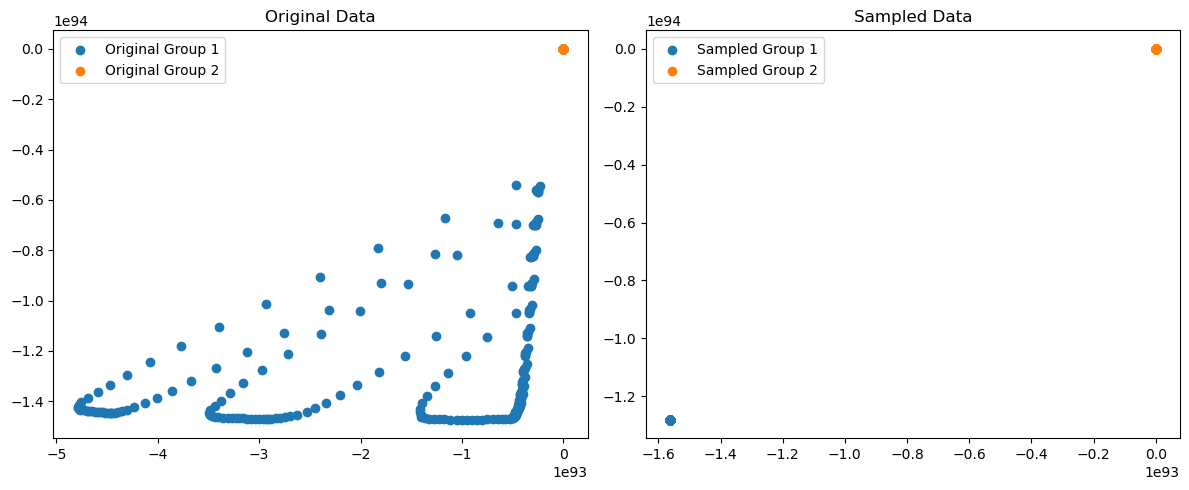

In [58]:
X1,X2 = fit['trials'][0]['mu'], fit2['trials'][0]['mu']
pcca = ProbabilisticCCA(n_components=2, n_iters=100)
pcca.fit(X1,X2)
X1_, X2_ = pcca.sample(200)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X1[:, 0], X1[:, 1], label='Original Group 1')
ax1.scatter(X2[:, 0], X2[:, 1], label='Original Group 2')
ax1.set_title('Original Data')
ax1.legend()

ax2.scatter(X1_[:, 0], X1_[:, 1], label='Sampled Group 1')
ax2.scatter(X2_[:, 0], X2_[:, 1], label='Sampled Group 2')
ax2.set_title('Sampled Data')
ax2.legend()

plt.tight_layout()
plt.show()

Resized datasets to match number of samples: 500
Initial W matrix: [[ 1.96938116e-03  3.26540360e-01]
 [-3.47219962e-01 -1.02331854e-01]
 [-2.29606305e-01  1.84631820e+00]
 [ 1.56496927e+00 -3.24268554e-01]
 [ 1.52112719e+00  2.04417888e+00]
 [-3.27790602e-01 -1.02753999e+00]
 [ 7.31530156e-01 -3.21107612e-01]
 [ 8.19507996e-01  3.01702288e-02]
 [ 3.52377965e-01 -3.07044085e-01]
 [-1.67651943e-01  2.21777068e+00]
 [ 1.59601706e+00  3.46255236e-01]
 [ 2.90600393e-01  1.21166518e-02]
 [ 8.87700228e-01  1.62008576e+00]
 [-6.39568721e-01 -1.14690926e+00]
 [-2.16910775e+00 -9.11809290e-01]
 [ 1.13463943e+00  1.75335710e+00]
 [ 1.67952265e+00  1.15403860e+00]
 [ 4.62615298e-01  2.24080209e-01]
 [ 3.01067482e-01  9.36828483e-01]
 [ 1.23907532e+00 -9.95783293e-01]
 [-6.57405766e-01  4.82827017e-02]
 [-5.96167185e-01 -1.45437119e+00]
 [-1.82664451e+00 -3.62920543e-01]
 [ 1.47584678e+00 -2.74968769e-01]
 [ 1.93195815e+00  7.58060838e-01]
 [-5.39881129e-01 -6.01394986e-02]
 [ 2.80629200e+00 -1.27

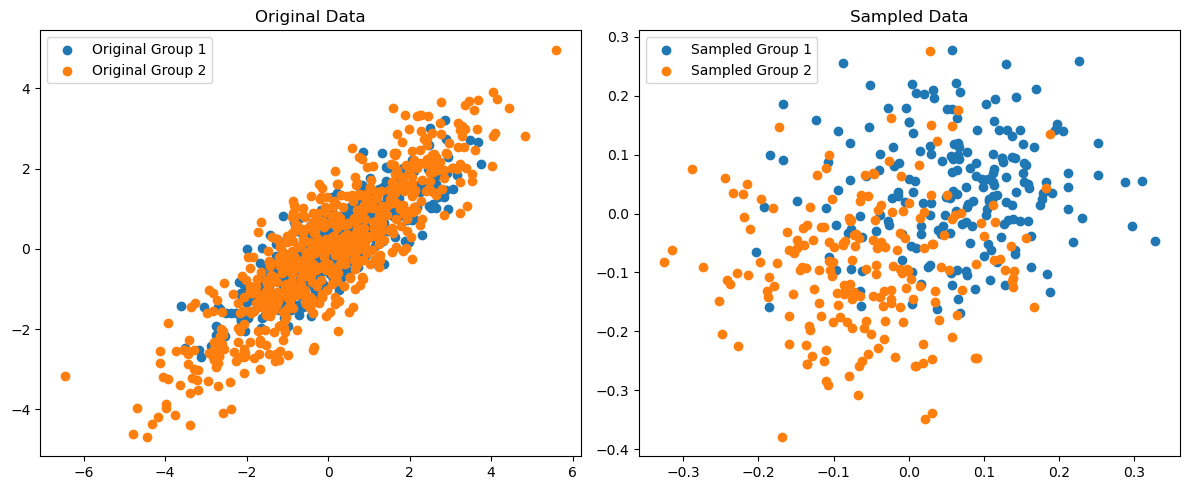

In [ ]:
pcca = ProbabilisticCCA(n_components=2, n_iters=100)
pcca.fit(X1, X2)
X1_, X2_ = pcca.sample(200)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X1[:, 0], X1[:, 1], label='Original Group 1')
ax1.scatter(X2[:, 0], X2[:, 1], label='Original Group 2')
ax1.set_title('Original Data')
ax1.legend()

ax2.scatter(X1_[:, 0], X1_[:, 1], label='Sampled Group 1')
ax2.scatter(X2_[:, 0], X2_[:, 1], label='Sampled Group 2')
ax2.set_title('Sampled Data')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
#try using vstack instead of hstack so the dimensions line up properly
#alternatively, input to the function the tranposes of X1 and X2
# PIPELINE: IBL data --> vGPFA --> pCCA model


#next: compare how well our model does against some other model
#can also compare about some really simple models, like PCA
#take note of what i needed to change about greg's model to fit it for out project